In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FIG_NAME='temp2'
TITLE='butterfly20x20->inception-extra-fc'



In [3]:
CAPTION="Inception V3 with extra fc layer"
'''CAPTION='input([224,224,3]) -> conv(size=[1,1], kernels=3, pooling=No, act=Relu)\n'
CAPTION=CAPTION+'->conv(size=[2,2], kernels=15, pooling=[2,2], act=Relu)\n'
CAPTION=CAPTION+'->conv(size=[3,3], kernels=10, pooling=[3,3], act=Relu)\n'
CAPTION=CAPTION+'->fc(size=[9], act=sigmoid)\n'
CAPTION=CAPTION+'l2 regularized\n'
CAPTION=CAPTION+'loss = meanSq + l2_loss\n'''

"CAPTION='input([224,224,3]) -> conv(size=[1,1], kernels=3, pooling=No, act=Relu)\n'\nCAPTION=CAPTION+'->conv(size=[2,2], kernels=15, pooling=[2,2], act=Relu)\n'\nCAPTION=CAPTION+'->conv(size=[3,3], kernels=10, pooling=[3,3], act=Relu)\n'\nCAPTION=CAPTION+'->fc(size=[9], act=sigmoid)\n'\nCAPTION=CAPTION+'l2 regularized\n'\nCAPTION=CAPTION+'loss = meanSq + l2_loss\n"

In [4]:
hist={'trainCost': [0.43021566, 0.47642618, 0.28620192, 0.4247905, 0.28372788, 0.26020572, 0.2571867, 0.25737998, 0.25028187, 0.2500133, 0.24830514, 0.25426042, 0.25240576, 0.24793613, 0.24735072, 0.25114873, 0.28520522, 0.2537206, 0.24998477, 0.2474701, 0.24945585, 0.24603829, 0.24499266, 0.24493615, 0.24527058, 0.24420463, 0.24700035, 0.24478057, 0.24325588, 0.24313715, 0.24178965, 0.24174483, 0.24129781, 0.24197842, 0.24061406, 0.24027319, 0.2390066, 0.24034502, 0.23967172, 0.23906185, 0.23763314, 0.26894265, 0.25596392, 0.27002102, 0.26421666, 0.25053507, 0.24425757, 0.23988377, 0.24157457, 0.2363654, 0.23398273, 0.2322108, 0.23119296, 0.23110929, 0.23006448, 0.23804519, 0.24067187, 0.25209856, 0.23974419, 0.2295421, 0.2297819, 0.22838709, 0.22577943, 0.2259212, 0.22784136, 0.2259441, 0.22423802, 0.22370313, 0.22207949, 0.222284, 0.22204983, 0.21719612, 0.21640207, 0.21511632, 0.2157302, 0.21466318, 0.21486999, 0.21279955, 0.21163972, 0.21193917, 0.2145669, 0.21102862, 0.20825623, 0.21851009, 0.28581926, 0.2531506, 0.22242945, 0.21538149, 0.21704148, 0.21587701, 0.2108597, 0.20540048, 0.20073108, 0.19804174, 0.19626625, 0.19440593, 0.19778314, 0.18999667, 0.19046955, 0.18667717, 0.1942198, 0.18816337, 0.18119472, 0.1866292, 0.18461354, 0.18540327, 0.17848259, 0.17540403, 0.17521665, 0.17530347], 'testAcc': [0.50255, 0.498725, 0.50045, 0.497725, 0.497875, 0.50135, 0.498625, 0.498475, 0.501425, 0.4982, 0.500525, 0.50455, 0.5049, 0.503925, 0.503175, 0.503975, 0.50225, 0.5031, 0.4973, 0.5044, 0.4976, 0.4984, 0.5008, 0.50195, 0.4991, 0.502375, 0.500875, 0.504975, 0.504425, 0.502725, 0.5028, 0.50075, 0.503325, 0.50295, 0.5027, 0.502425, 0.5, 0.50165, 0.500625, 0.5028, 0.502075, 0.501025, 0.498975, 0.501875, 0.502625, 0.5028, 0.50125, 0.50385, 0.50335, 0.50005, 0.50115, 0.501075, 0.50175, 0.502825, 0.503375, 0.499475, 0.5005, 0.499275, 0.4993, 0.499175, 0.500425, 0.501525, 0.498525, 0.5032, 0.49805, 0.498875, 0.499375, 0.49855, 0.499825, 0.5005, 0.49875, 0.49805, 0.501925, 0.501025, 0.4987, 0.497375, 0.49975, 0.5011, 0.497925, 0.498925, 0.499925, 0.4965, 0.497475, 0.4984, 0.503125, 0.50025, 0.4984, 0.497725, 0.497725, 0.497075, 0.4976, 0.495, 0.500075, 0.499375, 0.494125, 0.497375, 0.498625, 0.4977, 0.4978, 0.497475, 0.496875, 0.49665, 0.498225, 0.49815, 0.496825, 0.49615, 0.496175, 0.4972, 0.49435, 0.498575], 'testCost': [0.43022045, 0.47942457, 0.28609952, 0.43808365, 0.29336622, 0.2620584, 0.2623968, 0.26387632, 0.25218362, 0.25248843, 0.25185704, 0.25894848, 0.25876024, 0.25204727, 0.2517681, 0.25488558, 0.28815123, 0.25677404, 0.254396, 0.25299466, 0.25439087, 0.25355798, 0.25359133, 0.25339842, 0.25386706, 0.25447983, 0.25647846, 0.2553743, 0.2549928, 0.25579503, 0.25583532, 0.2558424, 0.25580588, 0.25702322, 0.25668287, 0.25687274, 0.2564764, 0.25807506, 0.25828516, 0.25833753, 0.25898963, 0.27043048, 0.26374674, 0.27458048, 0.26785162, 0.26124823, 0.2615869, 0.2615429, 0.26474875, 0.26371983, 0.26264638, 0.26296693, 0.2634567, 0.26399618, 0.26503667, 0.2613256, 0.26143605, 0.2759622, 0.2672583, 0.26776832, 0.2688487, 0.26569512, 0.26799923, 0.27141201, 0.2688748, 0.27122045, 0.27067018, 0.270783, 0.27070004, 0.27285197, 0.2719292, 0.27398267, 0.27485773, 0.27310365, 0.27496606, 0.27466005, 0.27596942, 0.27622783, 0.2761753, 0.27811742, 0.27893433, 0.2773421, 0.27911788, 0.28131622, 0.29838455, 0.279734, 0.28042623, 0.27456158, 0.28318754, 0.28426427, 0.28101265, 0.28867906, 0.28525567, 0.28200197, 0.28571373, 0.28856978, 0.29054457, 0.29143283, 0.28496137, 0.2914604, 0.29204094, 0.291241, 0.2881082, 0.29023838, 0.29371396, 0.29029015, 0.29732963, 0.2946574, 0.2944981, 0.2954643], 'trainAcc': [0.5005556, 0.5016417, 0.50574166, 0.5023139, 0.50900835, 0.5151306, 0.51308054, 0.5226833, 0.5276861, 0.52834165, 0.5319, 0.5181111, 0.5262028, 0.5350361, 0.54049724, 0.5194611, 0.50243336, 0.5147611, 0.52748054, 0.54204166, 0.5357222, 0.54873335, 0.55633336, 0.5571139, 0.55396664, 0.56063056, 0.55343336, 0.5573528, 0.5655278, 0.56556946, 0.57196945, 0.57225555, 0.57405555, 0.57214725, 0.5781611, 0.57838887, 0.5844306, 0.5783806, 0.5805889, 0.5830028, 0.5896889, 0.50919724, 0.5308389, 0.5135389, 0.5135111, 0.5405194, 0.56333053, 0.5799139, 0.57459444, 0.59175, 0.6013, 0.60825276, 0.61078054, 0.60995555, 0.61313057, 0.5859, 0.57514447, 0.56542224, 0.5836333, 0.61433053, 0.61280835, 0.6184222, 0.62493336, 0.62236947, 0.6196833, 0.6239806, 0.62868613, 0.63069165, 0.6351, 0.63386947, 0.6339972, 0.64651114, 0.6481611, 0.6532861, 0.649975, 0.65329444, 0.6519806, 0.65694165, 0.66141945, 0.65861666, 0.6519333, 0.661, 0.6669528, 0.64124167, 0.52159166, 0.56021947, 0.6303028, 0.650775, 0.64412224, 0.64658886, 0.6595917, 0.6714417, 0.6828194, 0.68995833, 0.69343054, 0.6969417, 0.68775, 0.70493335, 0.7068139, 0.71202224, 0.6949389, 0.7099528, 0.72583336, 0.71241665, 0.7149861, 0.7159167, 0.72860277, 0.73559165, 0.7360944, 0.7357611]}







In [5]:
FIG_NAME='./fig/'+FIG_NAME+'.png'
trc=hist['trainCost']
tra=hist['trainAcc']
tec=hist['testCost']
tea=hist['testAcc']

#print(np.array(tra)-np.array(tea))

EPOCHS=len(trc)
e=range(EPOCHS)

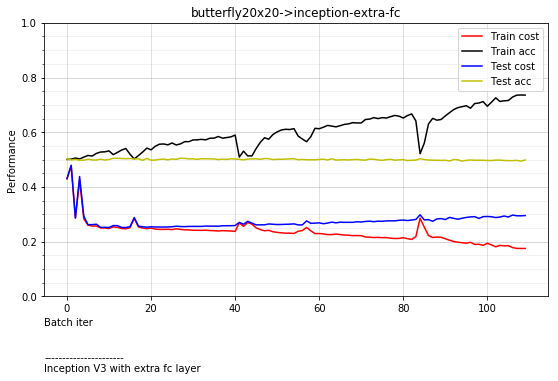

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.subplots_adjust(bottom=0.5, left=0.2)
ax.plot(e,trc,'r',e,tra,'k',e,tec,'b',e,tea,'y')
ax.set_xlabel('Batch iter\n\n\n----------------------\n'+CAPTION,horizontalalignment='left', x=0)
ax.set_ylabel("Performance")

plt.legend(['Train cost','Train acc','Test cost','Test acc'])


major_ticksY = np.arange(0, 1.05, 0.2)
minor_ticksY = np.arange(0, 1.05, 0.05)

#ax.set_xticks(major_ticksY)
#ax.set_xticks(minor_ticksY, minor=True)
ax.set_yticks(major_ticksY)
ax.set_yticks(minor_ticksY, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.title(TITLE)

plt.savefig(FIG_NAME,dpi=1000)
plt.show()